In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#The .dat file is already viewed and noticed that all columns are merged into one column separated by '::'
#So, importing the data giving condition to separate by '::' and preserving the dtypes
df_movies = pd.read_table('movies.dat',sep='::',names=['MovieID','Title','Genres'],header=None)

In [3]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [5]:
df_movies.shape

(3883, 3)

In [3]:
df_users = pd.read_table('users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'],header=None)

In [7]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
df_users.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [9]:
df_users.shape

(6040, 5)

In [4]:
df_ratings = pd.read_table('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'],header=None)

In [11]:
df_ratings.shape

(1000209, 4)

In [12]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [13]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
#Merging the tables - first two of them, then third with the merged one
df1 = pd.merge(df_movies,df_ratings,on='MovieID')

In [16]:
df1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [17]:
df1.shape

(1000209, 6)

In [6]:
df_mast = pd.merge(df1,df_users,on='UserID')

In [7]:
df_mast.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [20]:
df_mast.shape

(1000209, 10)

In [8]:
df_mast.drop_duplicates(keep=False,inplace=True)

In [22]:
df_mast.shape

(1000209, 10)

In [24]:
df_mast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [9]:
df_master = df_mast[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating','Genres']]

In [10]:
df_master.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres
0,1,Toy Story (1995),1,1,F,10,5,Animation|Children's|Comedy
1,48,Pocahontas (1995),1,1,F,10,5,Animation|Children's|Musical|Romance
2,150,Apollo 13 (1995),1,1,F,10,5,Drama
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,Action|Adventure|Fantasy|Sci-Fi
4,527,Schindler's List (1993),1,1,F,10,5,Drama|War


In [27]:
df_master.shape

(1000209, 8)

In [29]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Age         1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
 7   Genres      1000209 non-null  object
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [30]:
df_master.describe()

,MovieID,UserID,Age,Occupation,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,2.973831e+01,8.036138e+00,3.581564e+00
std,1.096041e+03,1.728413e+03,1.175198e+01,6.531336e+00,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.030000e+03,1.506000e+03,2.500000e+01,2.000000e+00,3.000000e+00
50%,1.835000e+03,3.070000e+03,2.500000e+01,7.000000e+00,4.000000e+00
75%,2.770000e+03,4.476000e+03,3.500000e+01,1.400000e+01,4.000000e+00
max,3.952000e+03,6.040000e+03,5.600000e+01,2.000000e+01,5.000000e+00


In [31]:
df_master.describe(include=object)

,Title,Gender,Genres
count,1000209,1000209,1000209
unique,3706,2,301
top,American Beauty (1999),M,Comedy
freq,3428,753769,116883


We can see there are no NaN fields no NULL rows present

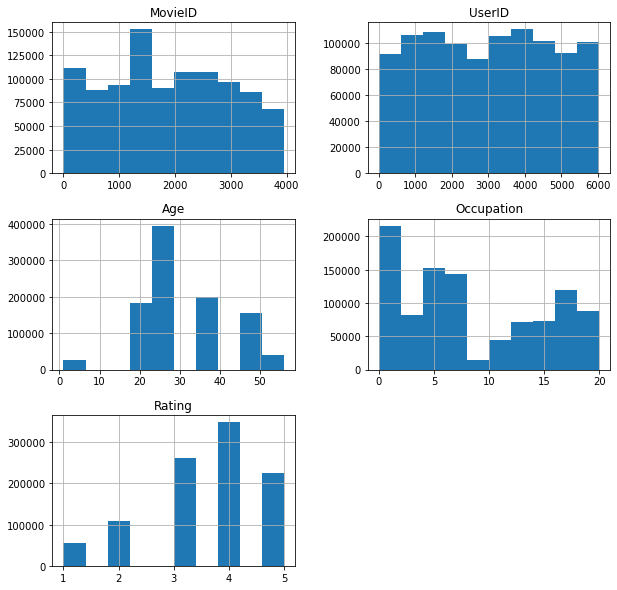

In [32]:
df_master.hist(figsize=(10,10))
plt.show()

<h3>User Age Distribution

In [33]:
df_age = df_master.copy()

In [34]:
df_age = df_age[['Age','UserID']]

In [35]:
df_age.drop_duplicates(inplace=True)
df_age.shape

(6040, 2)

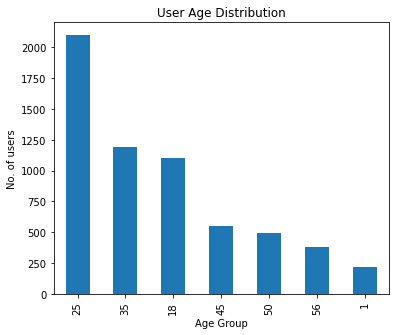

In [36]:
fig = plt.figure(figsize = (6, 5))
counts = pd.value_counts(df_age['Age'].values, sort=True)
counts.plot.bar()
plt.xlabel('Age Group')
plt.ylabel('No. of users')
plt.title('User Age Distribution')
plt.show()

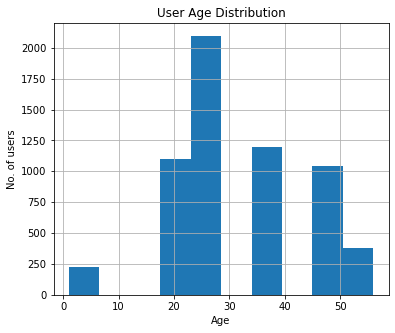

In [37]:
df_age['Age'].hist(figsize=(6,5))
plt.xlabel('Age')
plt.ylabel('No. of users')
plt.title('User Age Distribution')
plt.show()

From the above two graphs, we can see that maximum users(one-third) fall in 25-34 age group followed by 35-44 age group. There are very few users who are below 18.

<h3>User rating of the movie Toy Story

In [38]:
df_toy = df_master[df_master['Title']=='Toy Story (1995)']

In [39]:
df_toy.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres
0,1,Toy Story (1995),1,1,F,10,5,Animation|Children's|Comedy
53,1,Toy Story (1995),6,50,F,9,4,Animation|Children's|Comedy
124,1,Toy Story (1995),8,25,M,12,4,Animation|Children's|Comedy
263,1,Toy Story (1995),9,25,M,17,5,Animation|Children's|Comedy
369,1,Toy Story (1995),10,35,F,1,5,Animation|Children's|Comedy


In [40]:
df_toy.drop_duplicates(inplace=True)
df_toy.shape

(2077, 8)

In [41]:
df_toy['Rating'].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

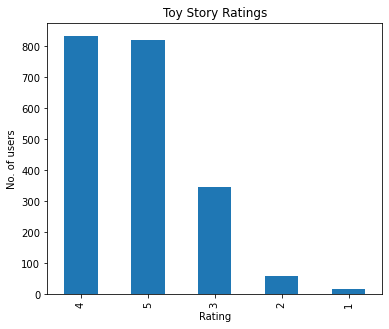

In [42]:
fig = plt.figure(figsize = (6, 5))
counts = pd.value_counts(df_toy['Rating'].values, sort=True)
counts.plot.bar()
plt.xlabel('Rating')
plt.ylabel('No. of users')
plt.title('Toy Story Ratings')
plt.show()

In [43]:
df_toy.describe()

,MovieID,UserID,Age,Occupation,Rating
count,2077.0,2077.000000,2077.000000,2077.000000,2077.000000
mean,1.0,3053.819933,27.700530,8.067886,4.146846
std,0.0,1750.606746,11.803826,6.379664,0.852349
min,1.0,1.000000,1.000000,0.000000,1.000000
25%,1.0,1532.000000,18.000000,3.000000,4.000000
50%,1.0,3146.000000,25.000000,7.000000,4.000000
75%,1.0,4571.000000,35.000000,14.000000,5.000000
max,1.0,6040.000000,56.000000,20.000000,5.000000


In [44]:
avg_rating = np.mean(df_toy['Rating'])
avg_rating

4.146846413095811

From the above, we notice that the movie Toy Story has 800+ 4* and 5* reviews each with an average rating of 4.14.


<h3>Top 25 movies by viewership rating

In [45]:
top_mov = df_master.copy()

In [46]:
top_movies = top_mov.groupby('Title').mean('Rating')

In [47]:
top_movies = top_movies.sort_values(by='Rating',ascending=False)

In [48]:
top_movies['Title'] = top_movies.index

In [49]:
top_movies = top_movies['Rating']
top_movies = top_movies.head(25)
top_movies

Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

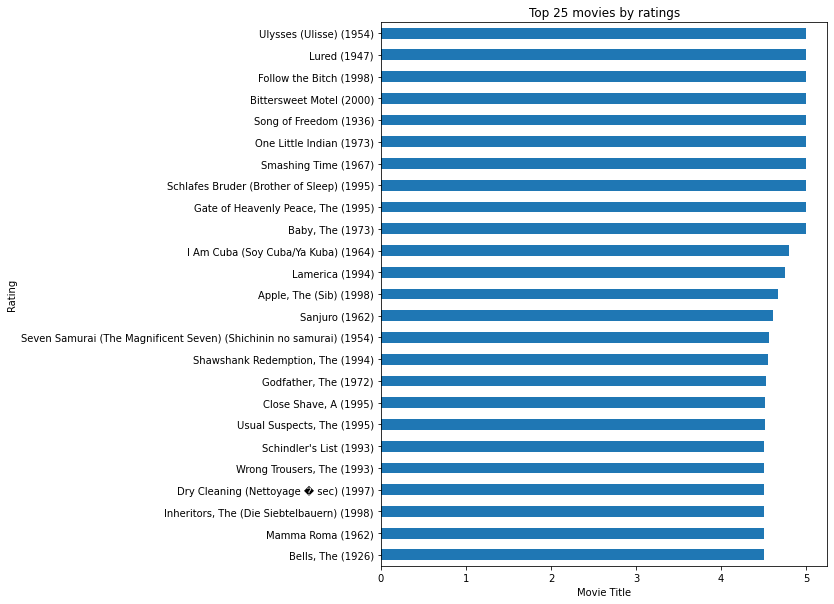

In [50]:
fig = plt.figure(figsize = (8, 10))
top_mov_plot = top_movies.plot(kind='barh')
top_mov_plot.invert_yaxis()
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Top 25 movies by ratings')
plt.show()

We can see there are 10 movies which have an average rating of 5.0. All of the top 25 movies have a mean rating of 4.5+

<h3>Ratings for all the movies reviewed by for a particular user of user id = 2696

In [51]:
df_user_rev = df_master[df_master['UserID']==2696]

In [52]:
df_user_rev.shape

(20, 8)

In [53]:
df_user_rev

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres
991035,350,"Client, The (1994)",2696,25,M,7,3,Drama|Mystery|Thriller
991036,800,Lone Star (1996),2696,25,M,7,5,Drama|Mystery
991037,1092,Basic Instinct (1992),2696,25,M,7,4,Mystery|Thriller
991038,1097,E.T. the Extra-Terrestrial (1982),2696,25,M,7,3,Children's|Drama|Fantasy|Sci-Fi
991039,1258,"Shining, The (1980)",2696,25,M,7,4,Horror
991040,1270,Back to the Future (1985),2696,25,M,7,2,Comedy|Sci-Fi
991041,1589,Cop Land (1997),2696,25,M,7,3,Crime|Drama|Mystery
991042,1617,L.A. Confidential (1997),2696,25,M,7,4,Crime|Film-Noir|Mystery|Thriller
991043,1625,"Game, The (1997)",2696,25,M,7,4,Mystery|Thriller
991044,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2,Horror|Mystery|Thriller


In [54]:
df_user_rev = df_user_rev.set_index('Title')

In [55]:
df_user_rev = df_user_rev.sort_values(by='Rating',ascending=False)

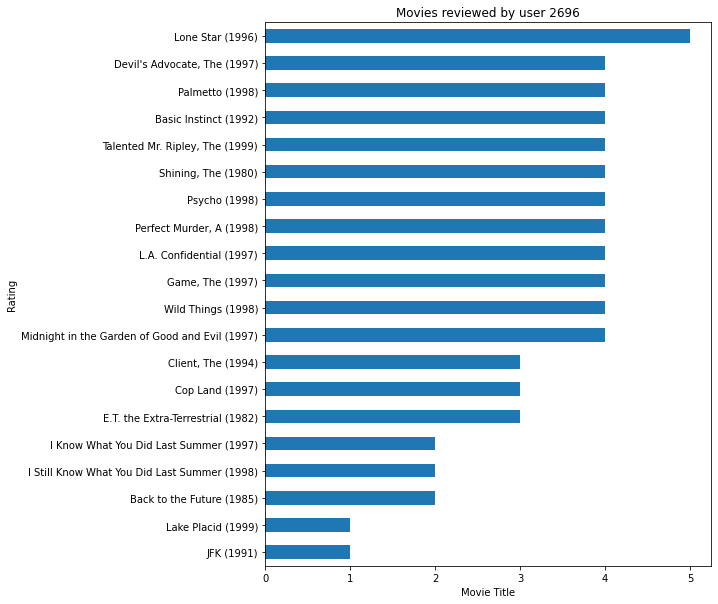

In [56]:
fig = plt.figure(figsize = (8, 10))
top_mov_plot = df_user_rev['Rating'].plot(kind='barh')
top_mov_plot.invert_yaxis()
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Movies reviewed by user 2696')
plt.show()

In [57]:
a = df_mast.copy()

In [58]:
a = a[a['UserID']==2696]

In [59]:
a.sort_values('Rating',ascending=False)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991045,1645,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller,2696,4,973308904,M,25,7,24210
991047,1783,Palmetto (1998),Film-Noir|Mystery|Thriller,2696,4,973308865,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991053,3176,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,2696,4,973308865,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991051,2389,Psycho (1998),Crime|Horror|Thriller,2696,4,973308710,M,25,7,24210
991049,1892,"Perfect Murder, A (1998)",Mystery|Thriller,2696,4,973308904,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210


In [60]:
print(np.mean(a['Rating']))

3.3


The user with userID 2696 gave ratings to 20 movies with an average rating of 3.3

<h3>Splitting the genres column and finding out all unique genres

In [11]:
final=df_master.copy()
final.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres
0,1,Toy Story (1995),1,1,F,10,5,Animation|Children's|Comedy
1,48,Pocahontas (1995),1,1,F,10,5,Animation|Children's|Musical|Romance
2,150,Apollo 13 (1995),1,1,F,10,5,Drama
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,Action|Adventure|Fantasy|Sci-Fi
4,527,Schindler's List (1993),1,1,F,10,5,Drama|War


In [12]:
final['Genres'] = final['Genres'].str.split("|")

In [13]:
df_explode = final.assign(names=final.Genres.str.split("|")).explode('Genres')

In [15]:
df_explode.drop(columns=['names'],inplace=True)

In [16]:
df_explode.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres
0,1,Toy Story (1995),1,1,F,10,5,Animation
0,1,Toy Story (1995),1,1,F,10,5,Children's
0,1,Toy Story (1995),1,1,F,10,5,Comedy
1,48,Pocahontas (1995),1,1,F,10,5,Animation
1,48,Pocahontas (1995),1,1,F,10,5,Children's


In [17]:
mov_split = df_master.copy()

In [18]:
mov_split['Genres'] = mov_split['Genres'].str.split("|")

In [19]:
s = mov_split['Genres'].explode()
mov_split = mov_split[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']].join(pd.crosstab(s.index, s))

In [20]:
mov_split.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,1,F,10,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,1,F,10,5,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,1,F,10,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,1,F,10,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df_explode['Genres'].unique()

array(['Animation', "Children's", 'Comedy', 'Musical', 'Romance', 'Drama',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Crime',
       'Thriller', 'Western', 'Horror', 'Mystery', 'Documentary',
       'Film-Noir'], dtype=object)

In [22]:
df_explode['Genres'].value_counts()

Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
Name: Genres, dtype: int64

All the unique genres are mentioned above with count of movies belonging to each genres

<h3> Features affecting ratings of movies

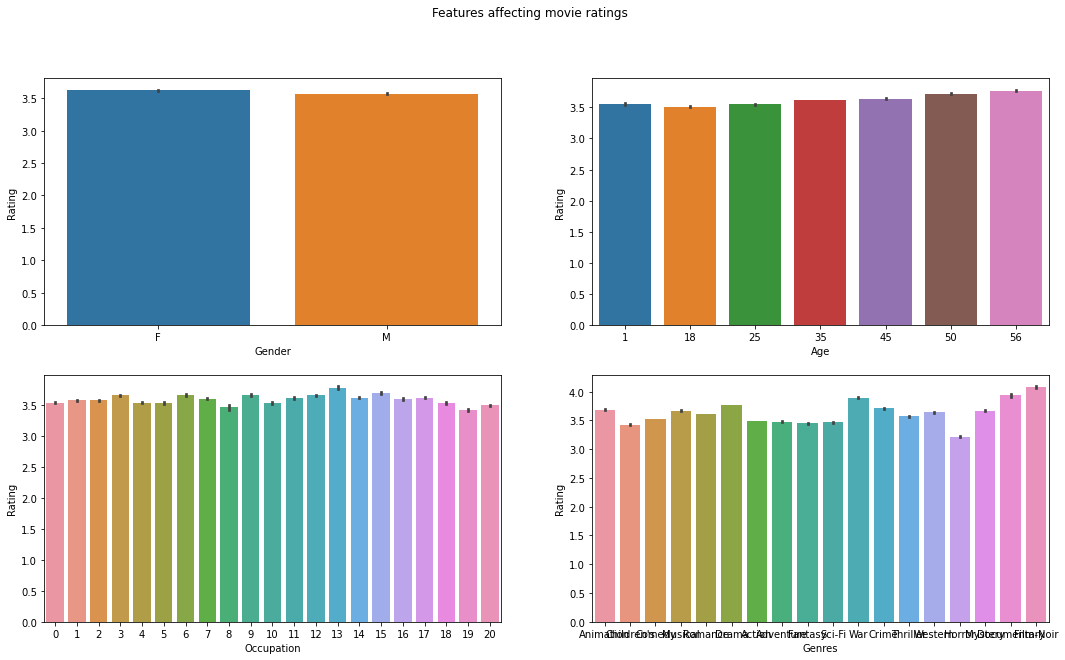

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Features affecting movie ratings')

sns.barplot(ax=axes[0, 0],x ='Gender', y ='Rating', data = df_mast)
sns.barplot(ax=axes[0, 1],x ='Age', y ='Rating', data = df_mast)
sns.barplot(ax=axes[1, 0],x ='Occupation', y ='Rating', data = df_mast)
sns.barplot(ax=axes[1, 1],x ='Genres', y ='Rating', data = df_explode)
plt.show()

We can infer the following from the above graphs:<br>
1. Gender: Females give a little bit higher average ratings than males(avg=3.5), although there is not much difference<br>
2. Age: On an average, users who fall in the 56+ age group tend to give comparably higher ratings while users in 18-24 age group give lower ratings. We can see that as age group increases, mean rating also increases.
3. Occupation: Retired and homemaker users tend to give higher ratings than other users
4. Genres: Movies with Film-Noir and Western genres have higher ratings than other movies. Horror based movies have lower rating than other movies. One noticeable thing here is that the count of movies rated is not uniform(some movies have been rated by more users than others)

<h3>Predicting the movie ratings

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [25]:
model_data = mov_split.copy()

In [26]:
model_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,1,F,10,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,1,F,10,5,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,1,F,10,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,1,F,10,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 25 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   UserID       1000209 non-null  int64 
 3   Age          1000209 non-null  int64 
 4   Gender       1000209 non-null  object
 5   Occupation   1000209 non-null  int64 
 6   Rating       1000209 non-null  int64 
 7   Action       1000209 non-null  int64 
 8   Adventure    1000209 non-null  int64 
 9   Animation    1000209 non-null  int64 
 10  Children's   1000209 non-null  int64 
 11  Comedy       1000209 non-null  int64 
 12  Crime        1000209 non-null  int64 
 13  Documentary  1000209 non-null  int64 
 14  Drama        1000209 non-null  int64 
 15  Fantasy      1000209 non-null  int64 
 16  Film-Noir    1000209 non-null  int64 
 17  Horror       1000209 non-null  int64 
 18  Musical      1000209 n

In [28]:
model_data.shape

(1000209, 25)

In [29]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [30]:
model_data['Gender'] = labelencoder.fit_transform(model_data['Gender'])
model_data['Age'] = labelencoder.fit_transform(model_data['Age'])

In [31]:
model_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,0,0,10,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,0,0,10,5,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,0,0,10,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,0,0,10,4,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,0,0,10,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
model_data.drop(columns=['MovieID','Title','UserID'],inplace=True)

In [33]:
model_data.head()

,Age,Gender,Occupation,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,10,5,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,10,5,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,10,4,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [111]:
model_data[['Occupation','Age']] = scaler.fit_transform(model_data[['Occupation','Age']])

In [112]:
model_data.head()

,Age,Gender,Occupation,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-1.839831,0,0.300683,5,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.839831,0,0.300683,5,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,-1.839831,0,0.300683,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.839831,0,0.300683,4,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,-1.839831,0,0.300683,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
X_features = model_data.drop(columns=['Rating'])
Y_target = model_data['Rating']

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_target,test_size=0.2,random_state=2)

In [36]:
X_train.shape

(800167, 21)

In [37]:
X_test.shape

(200042, 21)

In [38]:
Y_train.shape

(800167,)

In [39]:
Y_test.shape

(200042,)

In [40]:
logreg.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [41]:
log_pred = logreg.predict(X_test)

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [45]:
print('Mean Abs Error(MAE): ',metrics.mean_absolute_error(Y_test, log_pred))
print('Mean Sq Error(MSE): ',metrics.mean_squared_error(Y_test, log_pred))
print('Root Mean Sq Error(RMSE) :',np.sqrt(metrics.mean_squared_error(Y_test, log_pred)))
print('accuracy: ',accuracy_score(Y_test, log_pred))

Mean Abs Error(MAE):  0.8725617620299737
Mean Sq Error(MSE):  1.4219163975565132
Root Mean Sq Error(RMSE) : 1.1924413602171442
accuracy:  0.3489567190889913


So, we see that accuracy of the classification algorithm is ~35% i.e algorithm can predict 35% of total correct values.

In [47]:
pred = pd.DataFrame({'Test value': Y_test, 'Predicted value': log_pred})
pred.head()

,Test value,Predicted value
758856,4,4
345912,4,4
586911,3,4
424866,3,4
538336,3,4


In [117]:
test1 = mov_split.copy()
test1['Genres'] = test1['Genres'].astype('category')
test1['Genres'] = test1['Genres'].cat.codes
test1.head()

,Age,Gender,MovieID,Occupation,Rating,Timestamp,Title,UserID,Zip-code,Genres
0,1,F,1,10,5,978824268,Toy Story (1995),1,48067,2
1,1,F,1,10,5,978824268,Toy Story (1995),1,48067,3
2,1,F,1,10,5,978824268,Toy Story (1995),1,48067,4
3,1,F,48,10,5,978824351,Pocahontas (1995),1,48067,2
4,1,F,48,10,5,978824351,Pocahontas (1995),1,48067,3


<AxesSubplot:>

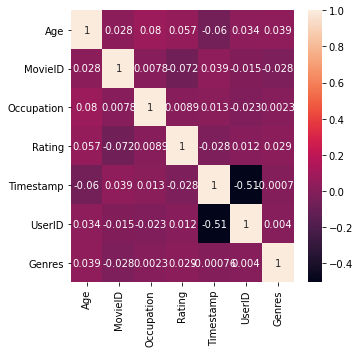

In [118]:
plt.figure(figsize=(5,5))
sns.heatmap(test1.corr(),annot=True)

Now, let's check the same using Decision Tree Classifier and Random Forest Classifier and see if there is any improvement in accuracy.

In [48]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()

In [49]:
DT_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [50]:
dt_pred = DT_classifier.predict(X_test)

In [51]:
print('Mean Abs Error(MAE): ',metrics.mean_absolute_error(Y_test, dt_pred))
print('Mean Sq Error(MSE): ',metrics.mean_squared_error(Y_test, dt_pred))
print('Root Mean Sq Error(RMSE) :',np.sqrt(metrics.mean_squared_error(Y_test, dt_pred)))
print('Accuracy Score: ',accuracy_score(Y_test, dt_pred))

Mean Abs Error(MAE):  0.8970816128612992
Mean Sq Error(MSE):  1.5223803001369713
Root Mean Sq Error(RMSE) : 1.2338477621396293
Accuracy Score:  0.35232101258735665


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [53]:
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [54]:
rf_pred = rf_classifier.predict(X_test)

In [55]:
print('Mean Abs Error(MAE): ',metrics.mean_absolute_error(Y_test, rf_pred))
print('Mean Sq Error(MSE): ',metrics.mean_squared_error(Y_test, rf_pred))
print('Root Mean Sq Error(RMSE) :',np.sqrt(metrics.mean_squared_error(Y_test, rf_pred)))
print('Accuracy Score: ',accuracy_score(y_true=Y_test, y_pred=rf_pred))

Mean Abs Error(MAE):  0.8920976594915068
Mean Sq Error(MSE):  1.5106777576708892
Root Mean Sq Error(RMSE) : 1.2290963174913874
Accuracy Score:  0.35464552443986763


<h4>The Accuracy is nearly same for all models.

In [56]:
rfpred = pd.DataFrame({'Test value': Y_test, 'Predicted value': rf_pred})
rfpred.head()

,Test value,Predicted value
758856,4,4
345912,4,5
586911,3,5
424866,3,4
538336,3,3


<h4>Now, let's check the same using XGBoost Classifier

In [57]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()

In [58]:
xgbc.fit(X_train,Y_train)

[23:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
xgpred = xgbc.predict(X_test)

In [61]:
accuracy_score(Y_test,xgpred)

0.36651303226322474

We can see, the accuracy is almost same with XGBoost classifier having maximum accuracy(nearly 36.6%)